In [75]:
import pandas as pd
import numpy as np
import os
from statistics import mean
# Machine Learning Libraries
from sklearn.ensemble import RandomForestClassifier
# Randomized Search of Hyperparameters
from scipy.stats import randint
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV

# Analysis of accuracy
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
# Export the tree
from sklearn.tree import export_graphviz
# Convert to png using system command
from subprocess import call

# Feature Importance
from sklearn.inspection import permutation_importance

# Import and image to jupyter notebook
from IPython.display import Image
import time
#Work with plots
import matplotlib.pyplot as plt

# Training and testing sampling
# to ensure sam proportion of samples
# in trainign and testing compared
# with the whole dataset proportion
from sklearn.model_selection import train_test_split
from collections import Counter

# Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [76]:
#Data
dirname = os.getcwd()
train_csv = os.path.join(dirname, "training.csv")
missing_values = ["n/a", "na", "--"]
train = pd.read_csv(variables_csv, na_values = missing_values)
testing_csv = os.path.join(dirname, "testing.csv")
test = pd.read_csv(testing_csv, na_values = missing_values)
print (train.iloc[:, [1,2]])

     BrdIndx  Area
0       1.27    91
1       2.36   241
2       2.12   266
3       2.42   399
4       2.15   944
..       ...   ...
163     1.43    39
164     1.92   141
165     2.97   252
166     1.57   216
167     2.12   836

[168 rows x 2 columns]


In [77]:
print("Rows and Columns(Train): ",train.shape)
print("Rows and Columns(Test) : ",test.shape)

Rows and Columns(Train):  (168, 148)
Rows and Columns(Test) :  (507, 148)


In [78]:
# check for missing values although it is clear there are none
train.isnull().any().any()

False

In [79]:
# duplicated function of pandas returns a duplicate row as true and others as false
sum(train.duplicated())

0

In [80]:
train.columns

Index(['class', 'BrdIndx', 'Area', 'Round', 'Bright', 'Compact', 'ShpIndx',
       'Mean_G', 'Mean_R', 'Mean_NIR',
       ...
       'SD_NIR_140', 'LW_140', 'GLCM1_140', 'Rect_140', 'GLCM2_140',
       'Dens_140', 'Assym_140', 'NDVI_140', 'BordLngth_140', 'GLCM3_140'],
      dtype='object', length=148)

In [81]:
test.columns

Index(['class', 'BrdIndx', 'Area', 'Round', 'Bright', 'Compact', 'ShpIndx',
       'Mean_G', 'Mean_R', 'Mean_NIR',
       ...
       'SD_NIR_140', 'LW_140', 'GLCM1_140', 'Rect_140', 'GLCM2_140',
       'Dens_140', 'Assym_140', 'NDVI_140', 'BordLngth_140', 'GLCM3_140'],
      dtype='object', length=148)

In [82]:
# Target variable
Y_train = train["class"].copy()
Y_test  = test["class"].copy()

In [83]:
Y_train.value_counts()

grass        29
building     25
concrete     23
tree         17
shadow       16
car          15
pool         15
asphalt      14
soil         14
Name: class, dtype: int64

Y_test.value_counts()

Feature Set 1: Columns 1 to 21 (No Scale)

Feature Set 2: Columns 22 to 42 (Scale: 40)

Feature Set 3: Columns 43 to 63 (Scale: 60)

Feature Set 4: Columns 64 to 84 (Scale: 80)

Feature Set 5: Columns 85 to 105 (Scale: 100)

Feature Set 6: Columns 106 to 126 (Scale: 120)

Feature Set 7: Columns 127 to 147 (Scale: 140)

In [84]:
train.columns[0]

'class'

In [85]:
#for i in range(7):
#    origin = 20*i + i + 1
#    destination = 20*i + i + 22
#    print(range(origin,destination))
#    for n in range(origin,destination):
#        print(n)
#        print(train.columns[n])

In [86]:
for i in range(7):
    origin = 20*i + i + 1
    destination = 20*i + i + 22
    #print(range(origin,destination))
    #for n in range(origin,destination):
    #    print(n)
    #    print(train.columns[n])
    X_train = train.iloc[:,range(origin,destination)]
    X_test  = test.iloc[:,range(origin,destination)]
    print(X_train.columns)
    print(X_test.columns)

Index(['BrdIndx', 'Area', 'Round', 'Bright', 'Compact', 'ShpIndx', 'Mean_G',
       'Mean_R', 'Mean_NIR', 'SD_G', 'SD_R', 'SD_NIR', 'LW', 'GLCM1', 'Rect',
       'GLCM2', 'Dens', 'Assym', 'NDVI', 'BordLngth', 'GLCM3'],
      dtype='object')
Index(['BrdIndx', 'Area', 'Round', 'Bright', 'Compact', 'ShpIndx', 'Mean_G',
       'Mean_R', 'Mean_NIR', 'SD_G', 'SD_R', 'SD_NIR', 'LW', 'GLCM1', 'Rect',
       'GLCM2', 'Dens', 'Assym', 'NDVI', 'BordLngth', 'GLCM3'],
      dtype='object')
Index(['BrdIndx_40', 'Area_40', 'Round_40', 'Bright_40', 'Compact_40',
       'ShpIndx_40', 'Mean_G_40', 'Mean_R_40', 'Mean_NIR_40', 'SD_G_40',
       'SD_R_40', 'SD_NIR_40', 'LW_40', 'GLCM1_40', 'Rect_40', 'GLCM2_40',
       'Dens_40', 'Assym_40', 'NDVI_40', 'BordLngth_40', 'GLCM3_40'],
      dtype='object')
Index(['BrdIndx_40', 'Area_40', 'Round_40', 'Bright_40', 'Compact_40',
       'ShpIndx_40', 'Mean_G_40', 'Mean_R_40', 'Mean_NIR_40', 'SD_G_40',
       'SD_R_40', 'SD_NIR_40', 'LW_40', 'GLCM1_40', 'Rect_40', 

In [87]:
#Define the model and datasets for training and testing
X_train = train.iloc[:,1:21]
X_test  = test.iloc[:,1:21]
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((168, 20), (168,), (507, 20), (507,))

In [88]:
# dictionary to save results
rf_results_model1 = {'index' : [], 'scale' : [], 
                     'accuracy' : [], 'error' : [],
                     'cv_mean' : [], 'cv_std' : []}
rf_results_model2 = {'index' : [], 'clf_best' : [], 'X_train' : [],'Y_train' : [],
                     'X_test' : [], 'Y_test' : []}
#Random Forest Classifier
for i in range(7):
    origin = 20*i + i + 1
    destination = 20*i + i + 22
    X_train = train.iloc[:,range(origin,destination)]
    X_test  = test.iloc[:,range(origin,destination)]
    the_scale = 20 * i + 20
    if i == 0:
        the_scale = "NA"
    param_dist = {
        "max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
        #"max_features": randint(1, 15),
        "max_features": list(range(1,11,1)),  # sqrt(25)
        "max_samples": [x / 10 for x in list(range(1,11,1))],
        "min_samples_split": list(range(2,11,1)),
        #"bootstrap": [True, False],
        "criterion": ["gini", "entropy"],
        "n_estimators": [5, 10, 50, 100, 500, 1000] # As long as possible
    }

    #Random Search of Best Parameters
    rng = np.random.RandomState(0)
    clf = RandomForestClassifier(random_state = rng)
    rsh = HalvingRandomSearchCV(
        estimator=clf, param_distributions=param_dist, factor=2, random_state=rng
    )

    # Fit the model
    rsh.fit(X_train, Y_train)

    #Display the best parameters
    pars = str(rsh.best_params_)
    pars = pars.replace(",", ",\n")

    #Get the classifier with the best parameters
    clf_best = rsh.best_estimator_
    Y_hat = clf_best.predict(X_test)

    # mean accuracy test dataset
    the_accuracy = clf_best.score(X_test, Y_test)
    #Classification Error (Testing Error Rate)
    the_error = np.mean(Y_hat != Y_test)

    #Evaluate the model with cross-validation (best model of random search)
    #repeated stratitied k-fold with
    #three repeats and 5 folds
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    n_scores = cross_val_score(clf_best, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    # report performance
    #print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
    the_mean_accuracy = np.mean(n_scores)
    the_std_accuracy = np.std(n_scores)
    
    #Save results in dictionary    
    rf_results_model1['index'].append(i)
    rf_results_model1['scale'].append(the_scale)
    #rf_results_model1['clf_best'].append(clf_best)
    #rf_results_model1['X_train'].append(X_train)
    #rf_results_model1['Y_train'].append(Y_train)
    #rf_results_model1['X_test'].append(X_test)
    #rf_results_model1['Y_test'].append(Y_test)
    rf_results_model1['accuracy'].append(the_accuracy)
    rf_results_model1['error'].append(the_error)
    rf_results_model1['cv_mean'].append(the_mean_accuracy)
    rf_results_model1['cv_std'].append(the_std_accuracy)
    #
    rf_results_model2['index'].append(i)
    rf_results_model2['clf_best'].append(clf_best)
    rf_results_model2['X_train'].append(X_train)
    rf_results_model2['Y_train'].append(Y_train)
    rf_results_model2['X_test'].append(X_test)
    rf_results_model2['Y_test'].append(Y_test)
    

In [89]:
# print each data item in dic rf_results_model1
for key, value in rf_results_model1.items():
    #index, scale, accuracy, error, mean, std = value
    #print ("{:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format(index, scale, accuracy, error, mean, std))
    print(key)
    print(value)

index
[0, 1, 2, 3, 4, 5, 6]
scale
['NA', 40, 60, 80, 100, 120, 140]
accuracy
[0.5009861932938856, 0.571992110453649, 0.534516765285996, 0.5088757396449705, 0.6429980276134122, 0.5187376725838264, 0.5029585798816568]
error
[0.4990138067061144, 0.4280078895463511, 0.46548323471400394, 0.4911242603550296, 0.35700197238658776, 0.4812623274161736, 0.4970414201183432]
cv_mean
[0.5773024361259655, 0.5693998811645871, 0.5775401069518717, 0.603149138443256, 0.555496137849079, 0.5651812240047533, 0.5651812240047533]
cv_std
[0.06540332348762962, 0.08114261779126268, 0.06733156191552854, 0.04908326948801505, 0.08591816792923844, 0.052426690662121335, 0.052426690662121335]


In [90]:
# print each data item in dic rf_results_model2
#for key, value in rf_results_model2.items():
#    print(key)
#    print(value)

In [91]:
#
#Index of the MAX accuracy element in a dictionary
the_index = rf_results_model1['accuracy'].index(max(rf_results_model1['accuracy']))
the_scale = rf_results_model1['scale'][the_index]
the_accuracy = rf_results_model1['accuracy'][the_index]
the_index, the_scale, the_accuracy

(4, 100, 0.6429980276134122)

In [92]:
# From the best model, get feature importance
clf_best = rf_results_model2['clf_best'][the_index]
X_train = rf_results_model2['X_train'][the_index]
Y_train = rf_results_model2['Y_train'][the_index]
X_test = rf_results_model2['X_test'][the_index]
Y_test = rf_results_model2['Y_test'][the_index]

In [93]:
# Extract single tree
estimator = clf_best.estimators_[0]

In [94]:
estimator

DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features=7,
                       min_samples_split=4, random_state=209652396)

In [95]:
X_train.columns

Index(['BrdIndx_100', 'Area_100', 'Round_100', 'Bright_100', 'Compact_100',
       'ShpIndx_100', 'Mean_G_100', 'Mean_R_100', 'Mean_NIR_100', 'SD_G_100',
       'SD_R_100', 'SD_NIR_100', 'LW_100', 'GLCM1_100', 'Rect_100',
       'GLCM2_100', 'Dens_100', 'Assym_100', 'NDVI_100', 'BordLngth_100',
       'GLCM3_100'],
      dtype='object')

In [96]:
Y_train.name

'class'

In [97]:
# Export as dot file
#export_graphviz(estimator, out_file='./out/one_tree.dot', 
#                feature_names = X_train.columns,
#                class_names = Y_train.name,
#                rounded = True, proportion = False, 
#                precision = 2, filled = True)

In [98]:
# Convert to png using system command (requires Graphviz)
#call(['dot', '-Tpng', './out/one_tree.dot', '-o', './out/one_tree.png', '-Gdpi=600'])

In [99]:
# Display in jupyter notebook
#Image(filename = './out/one_tree.png')

In [100]:
# Features Importance - MDI
#Feature importance based on Mean Decrease in Impurity
#Feature importances are provided by the fitted attribute 
# feature_importances_ and they are computed as the mean and 
# standard deviation of accumulation of the impurity decrease 
# within each tree.


start_time = time.time()
importances = clf_best.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_best.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.020 seconds


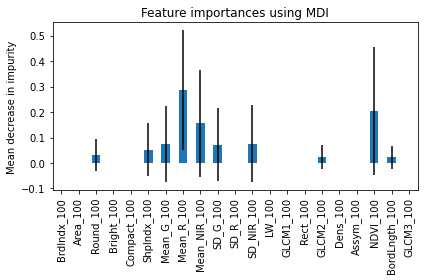

In [101]:
forest_importances = pd.Series(importances, index=X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [102]:
#Feature importance - FEATURE PERMUTATION
#Feature importance based on feature permutation
#Permutation feature importance overcomes limitations 
# of the impurity-based feature importance: they do not 
# have a bias toward high-cardinality features and can 
# be computed on a left-out test set.
start_time = time.time()
result = permutation_importance(
    clf_best, X_test, Y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=X_train.columns)

Elapsed time to compute the importances: 3.858 seconds


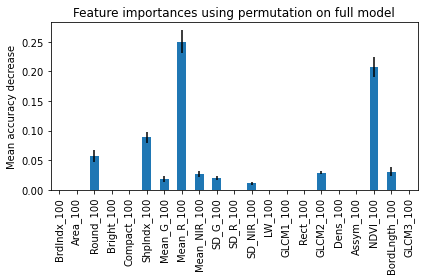

In [103]:
# The computation for full permutation importance is 
# more costly. Features are shuffled n times and the 
# model refitted to estimate the importance of it
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()
#Although the relative importances vary. As seen on the plots, 
# MDI is less likely than permutation importance to fully omit a feature.